In [1]:
import os
os.chdir("C:\\Users\\Hp\\Desktop\\Public Project")

%run -i "libraries.py"
%run -i "functions.py"

# 1. File Reading

In [2]:
data_prep = pd.read_csv("NYT-Preprocessing.csv", sep=";", encoding="UTF-8")

data_sampling = sampling(data_prep, 9)
print(len(data_sampling))

1967284


# 1.1 TF-IDF

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data_sampling["Comments"], 
                                                    data_sampling["Keywords"],
                                                    stratify=data_sampling["Keywords"],
                                                    test_size=0.3, random_state=0)

tfidf_vect = TfidfVectorizer(min_df=10, ngram_range=(1,2))
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf =  tfidf_vect.transform(X_test)

# 2. Models

# 2.1 Neural Network

We tried several models, but most of them were slow for a grid search (here 50 iterations are a very small number). <br>

In [9]:
%%time
mlp = MLPClassifier(max_iter=50, random_state=0)
param_grid = {"hidden_layer_sizes": [(20, 20)],
              "solver": ["lbfgs"],
              "alpha": [1e-08, 5e-08]}

mlp_clf = GridSearchCV(mlp, param_grid, n_jobs=1, cv=3, verbose=3)
mlp_clf.fit(X_train_tfidf, y_train)

# Best paramete set
print('Best parameters found:\n', mlp_clf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] alpha=1e-08, hidden_layer_sizes=(20, 20), solver=lbfgs ..........
[CV]  alpha=1e-08, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.35063782584581255, total= 4.6min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min remaining:    0.0s


[CV] alpha=1e-08, hidden_layer_sizes=(20, 20), solver=lbfgs ..........
[CV]  alpha=1e-08, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.35047698591880144, total= 4.6min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.3min remaining:    0.0s


[CV] alpha=1e-08, hidden_layer_sizes=(20, 20), solver=lbfgs ..........
[CV]  alpha=1e-08, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.3619358753787294, total= 4.6min
[CV] alpha=5e-08, hidden_layer_sizes=(20, 20), solver=lbfgs ..........
[CV]  alpha=5e-08, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.3504920992246039, total= 4.6min
[CV] alpha=5e-08, hidden_layer_sizes=(20, 20), solver=lbfgs ..........
[CV]  alpha=5e-08, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.35051178653303233, total= 4.5min
[CV] alpha=5e-08, hidden_layer_sizes=(20, 20), solver=lbfgs ..........
[CV]  alpha=5e-08, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.3619358753787294, total= 4.6min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 27.8min finished


Best parameters found:
 {'alpha': 1e-08, 'hidden_layer_sizes': (20, 20), 'solver': 'lbfgs'}
Wall time: 34min 7s


# 2.2 Naive Bayes

We found out later that Naive Bayes is a good model (better accuracy than every other NN or RF we tried) and it's super fast compare to them. We selected that model for an intensive grid search both on <b>TfidfVectorizer</b> and its parameters.

Min freq 10 	 n_gram range (1, 1) 	 (1379288, 42233)
                   precision    recall  f1-score   support

      Environment       0.48      0.57      0.52     55808
           Ethics       0.45      0.38      0.42     55808
             Guns       0.48      0.42      0.44     55808
    International       0.53      0.56      0.55     55808
             Laws       0.49      0.47      0.48     55808
             News       0.47      0.39      0.43     85448
US_Elections_2016       0.36      0.45      0.40     55807
      US_Politics       0.50      0.59      0.54     85197
   (Social)_Media       0.39      0.34      0.36     85632

      avg / total       0.46      0.46      0.46    591124



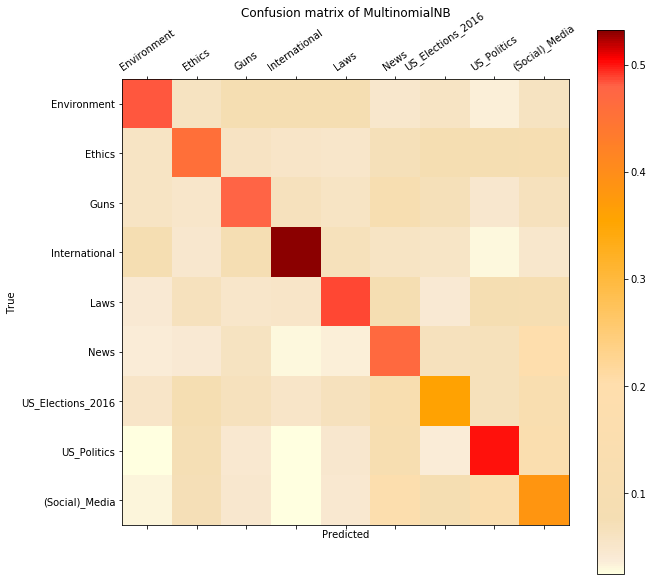

Accuracy:  0.45984429662811865 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 20 	 n_gram range (1, 1) 	 (1379288, 31561)
                   precision    recall  f1-score   support

      Environment       0.47      0.57      0.52     55808
           Ethics       0.44      0.38      0.41     55808
             Guns       0.47      0.41      0.44     55808
    International       0.53      0.55      0.54     55808
             Laws       0.48      0.47      0.47     55808
             News       0.47      0.39      0.42     85448
US_Elections_2016       0.35      0.44      0.39     55807
      US_Politics       0.50      0.59      0.54     85197
   (Social)_Media       0.39      0.33      0.36     85632

      avg / total       0.45      0.46      0.45    591124



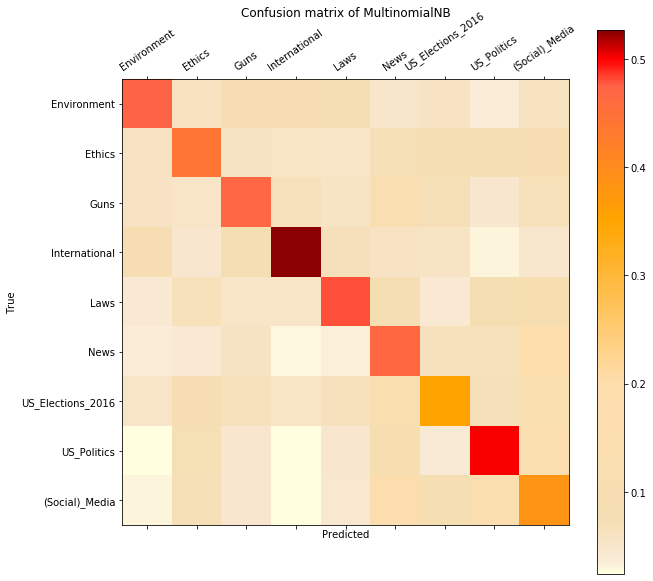

Accuracy:  0.4552581184320041 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 30 	 n_gram range (1, 1) 	 (1379288, 26948)
                   precision    recall  f1-score   support

      Environment       0.47      0.56      0.51     55808
           Ethics       0.43      0.38      0.40     55808
             Guns       0.46      0.40      0.43     55808
    International       0.52      0.55      0.54     55808
             Laws       0.48      0.47      0.47     55808
             News       0.47      0.38      0.42     85448
US_Elections_2016       0.35      0.44      0.39     55807
      US_Politics       0.50      0.59      0.54     85197
   (Social)_Media       0.38      0.33      0.36     85632

      avg / total       0.45      0.45      0.45    591124



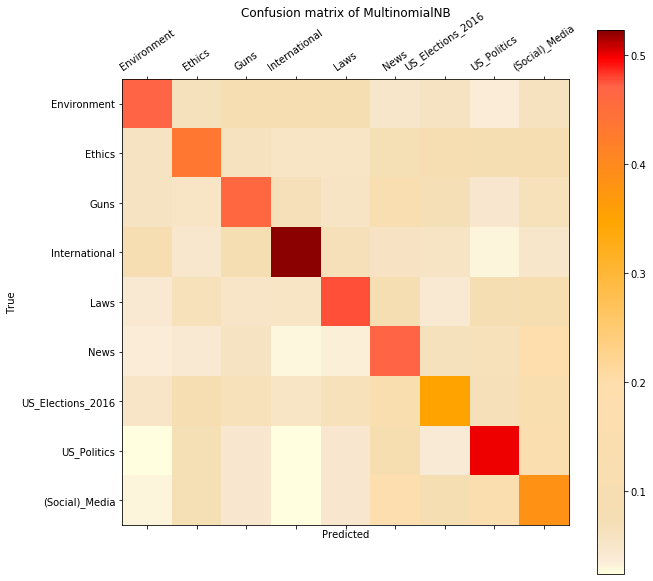

Accuracy:  0.45238562467434923 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 10 	 n_gram range (2, 2) 	 (1379288, 736218)
                   precision    recall  f1-score   support

      Environment       0.59      0.68      0.63     55808
           Ethics       0.61      0.53      0.57     55808
             Guns       0.63      0.58      0.60     55808
    International       0.66      0.70      0.68     55808
             Laws       0.62      0.60      0.61     55808
             News       0.49      0.41      0.45     85448
US_Elections_2016       0.49      0.55      0.52     55807
      US_Politics       0.51      0.61      0.55     85197
   (Social)_Media       0.40      0.36      0.38     85632

      avg / total       0.54      0.54      0.54    591124



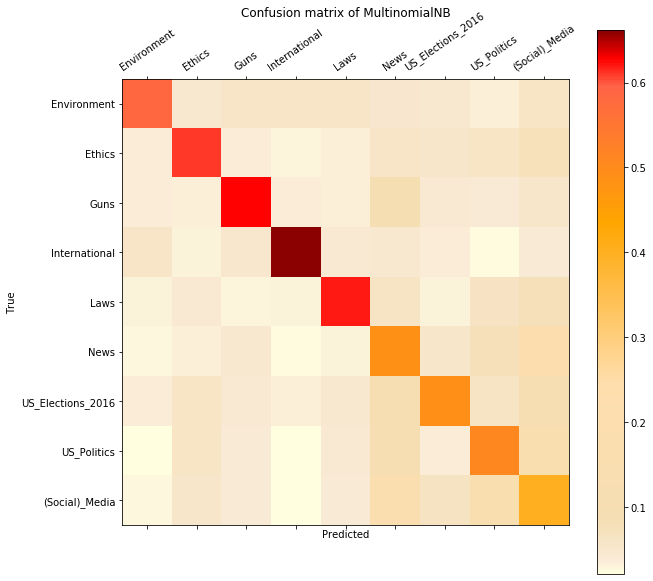

Accuracy:  0.5427000087968007 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 20 	 n_gram range (2, 2) 	 (1379288, 332811)
                   precision    recall  f1-score   support

      Environment       0.50      0.63      0.56     55808
           Ethics       0.52      0.46      0.49     55808
             Guns       0.53      0.50      0.52     55808
    International       0.60      0.63      0.61     55808
             Laws       0.54      0.53      0.53     55808
             News       0.48      0.38      0.43     85448
US_Elections_2016       0.42      0.49      0.45     55807
      US_Politics       0.49      0.59      0.54     85197
   (Social)_Media       0.39      0.33      0.36     85632

      avg / total       0.49      0.49      0.49    591124



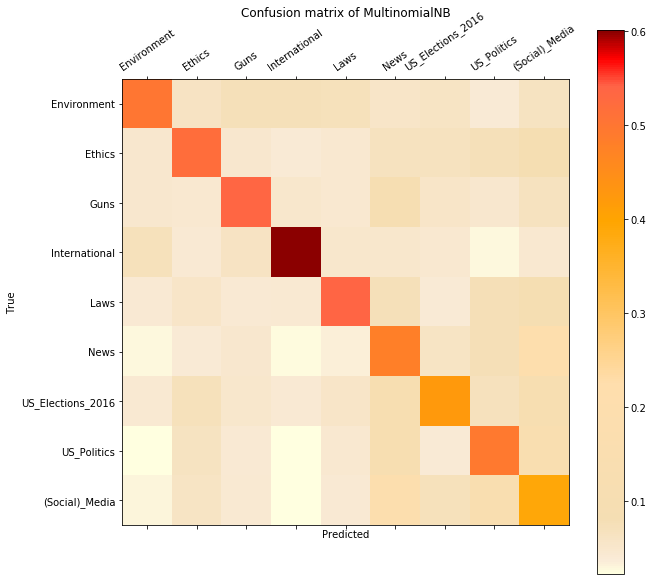

Accuracy:  0.49344638349990866 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 30 	 n_gram range (2, 2) 	 (1379288, 206135)
                   precision    recall  f1-score   support

      Environment       0.45      0.60      0.52     55808
           Ethics       0.47      0.42      0.44     55808
             Guns       0.48      0.45      0.47     55808
    International       0.57      0.59      0.58     55808
             Laws       0.49      0.48      0.48     55808
             News       0.47      0.37      0.41     85448
US_Elections_2016       0.39      0.45      0.42     55807
      US_Politics       0.49      0.58      0.53     85197
   (Social)_Media       0.38      0.31      0.34     85632

      avg / total       0.46      0.46      0.46    591124



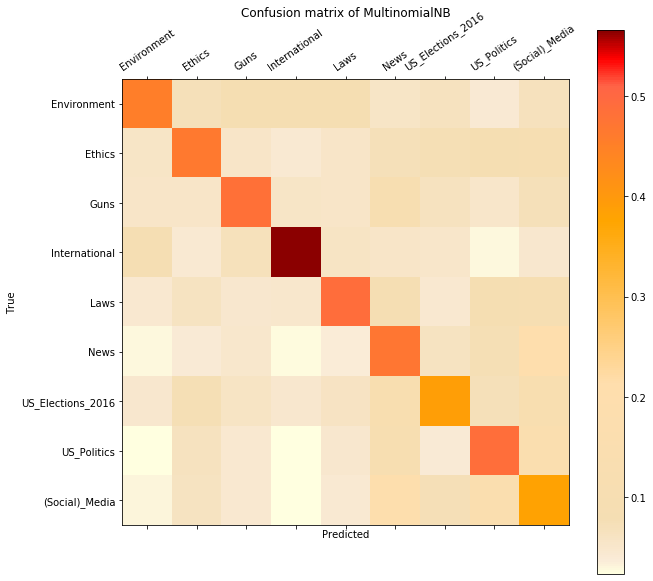

Accuracy:  0.4628808845521413 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 10 	 n_gram range (1, 2) 	 (1379288, 778451)
                   precision    recall  f1-score   support

      Environment       0.57      0.69      0.63     55808
           Ethics       0.61      0.51      0.55     55808
             Guns       0.63      0.55      0.59     55808
    International       0.65      0.67      0.66     55808
             Laws       0.61      0.57      0.59     55808
             News       0.50      0.43      0.46     85448
US_Elections_2016       0.48      0.53      0.51     55807
      US_Politics       0.52      0.63      0.57     85197
   (Social)_Media       0.41      0.39      0.40     85632

      avg / total       0.54      0.54      0.54    591124



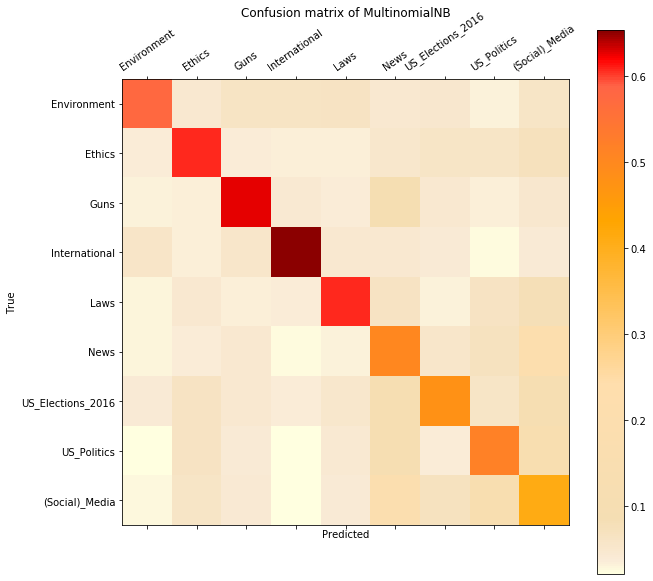

Accuracy:  0.5407816295734905 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 20 	 n_gram range (1, 2) 	 (1379288, 364372)
                   precision    recall  f1-score   support

      Environment       0.52      0.66      0.58     55808
           Ethics       0.54      0.46      0.50     55808
             Guns       0.56      0.50      0.53     55808
    International       0.61      0.62      0.62     55808
             Laws       0.55      0.53      0.54     55808
             News       0.50      0.40      0.44     85448
US_Elections_2016       0.43      0.49      0.46     55807
      US_Politics       0.51      0.61      0.56     85197
   (Social)_Media       0.41      0.36      0.38     85632

      avg / total       0.51      0.51      0.50    591124



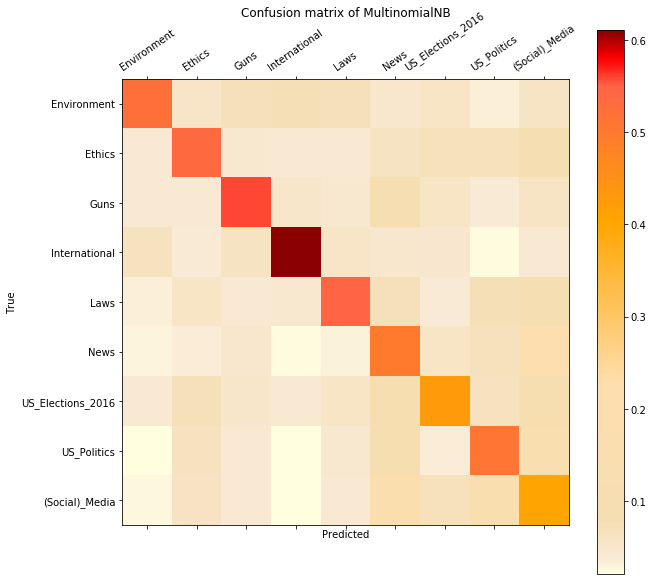

Accuracy:  0.5071034165420453 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 30 	 n_gram range (1, 2) 	 (1379288, 233083)
                   precision    recall  f1-score   support

      Environment       0.49      0.64      0.56     55808
           Ethics       0.50      0.44      0.47     55808
             Guns       0.52      0.47      0.50     55808
    International       0.59      0.59      0.59     55808
             Laws       0.52      0.50      0.51     55808
             News       0.50      0.39      0.44     85448
US_Elections_2016       0.40      0.48      0.44     55807
      US_Politics       0.51      0.61      0.55     85197
   (Social)_Media       0.40      0.35      0.37     85632

      avg / total       0.49      0.49      0.49    591124



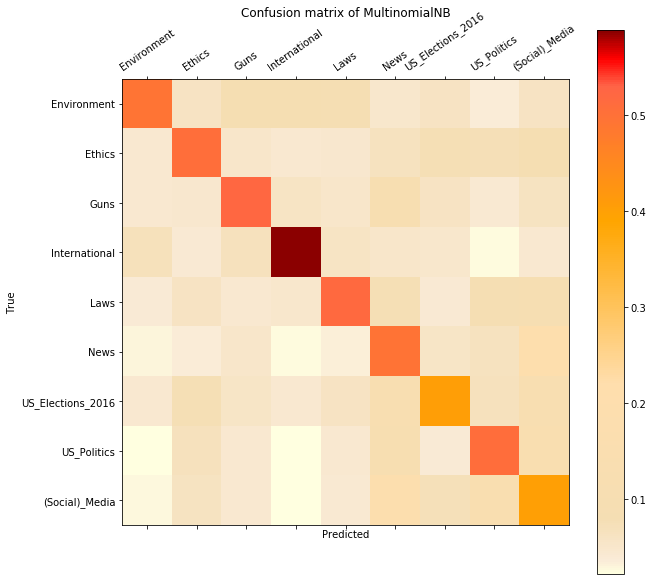

Accuracy:  0.4892526779491274 

Best parameters found:
 {'alpha': 0.25, 'fit_prior': False}
Min freq 10 	 n_gram range (3, 3) 	 (1379288, 144972)
                   precision    recall  f1-score   support

      Environment       0.17      0.73      0.28     55808
           Ethics       0.39      0.27      0.32     55808
             Guns       0.41      0.29      0.34     55808
    International       0.54      0.38      0.45     55808
             Laws       0.40      0.30      0.34     55808
             News       0.42      0.23      0.30     85448
US_Elections_2016       0.36      0.28      0.32     55807
      US_Politics       0.47      0.34      0.39     85197
   (Social)_Media       0.35      0.18      0.24     85632

      avg / total       0.39      0.32      0.33    591124



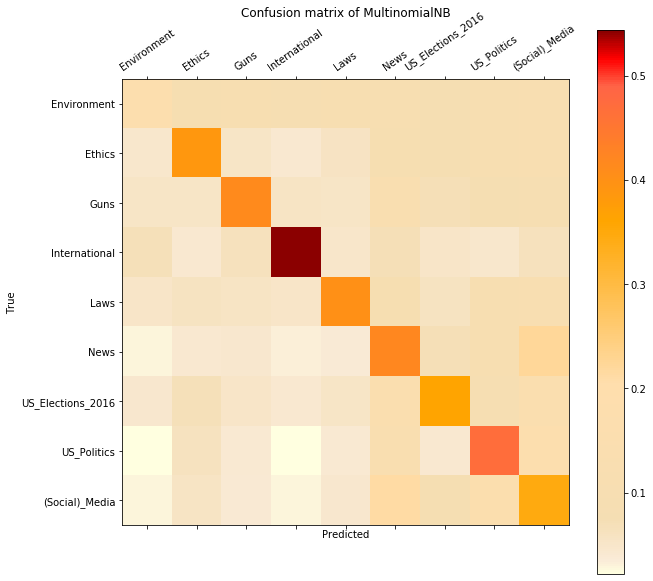

Accuracy:  0.32183602763548763 

Best parameters found:
 {'alpha': 0.0, 'fit_prior': False}
Min freq 20 	 n_gram range (3, 3) 	 (1379288, 43961)
                   precision    recall  f1-score   support

      Environment       0.31      0.18      0.23     55808
           Ethics       0.34      0.13      0.19     55808
             Guns       0.34      0.15      0.20     55808
    International       0.50      0.27      0.35     55808
             Laws       0.36      0.17      0.23     55808
             News       0.36      0.22      0.27     85448
US_Elections_2016       0.33      0.15      0.21     55807
      US_Politics       0.40      0.33      0.36     85197
   (Social)_Media       0.15      0.55      0.24     85632

      avg / total       0.34      0.26      0.26    591124



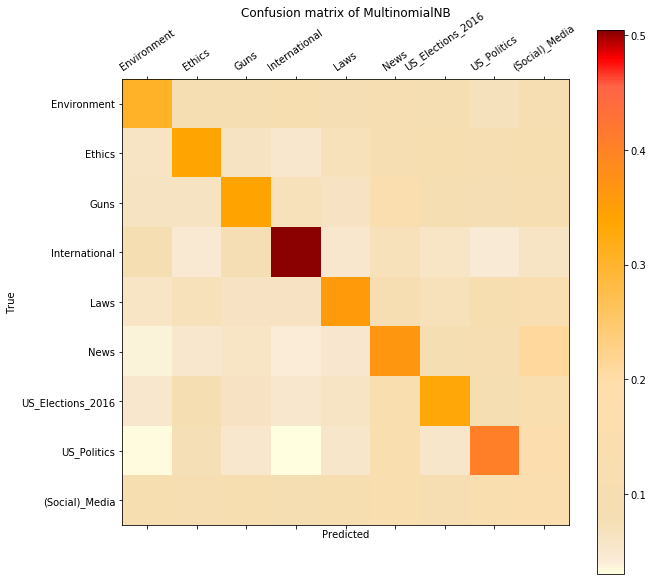

Accuracy:  0.2572827359403442 

Best parameters found:
 {'alpha': 0.5, 'fit_prior': True}
Min freq 30 	 n_gram range (3, 3) 	 (1379288, 22275)
                   precision    recall  f1-score   support

      Environment       0.27      0.14      0.18     55808
           Ethics       0.33      0.10      0.16     55808
             Guns       0.31      0.11      0.16     55808
    International       0.50      0.22      0.31     55808
             Laws       0.33      0.13      0.18     55808
             News       0.36      0.19      0.25     85448
US_Elections_2016       0.31      0.12      0.17     55807
      US_Politics       0.39      0.29      0.33     85197
   (Social)_Media       0.15      0.60      0.24     85632

      avg / total       0.32      0.23      0.23    591124



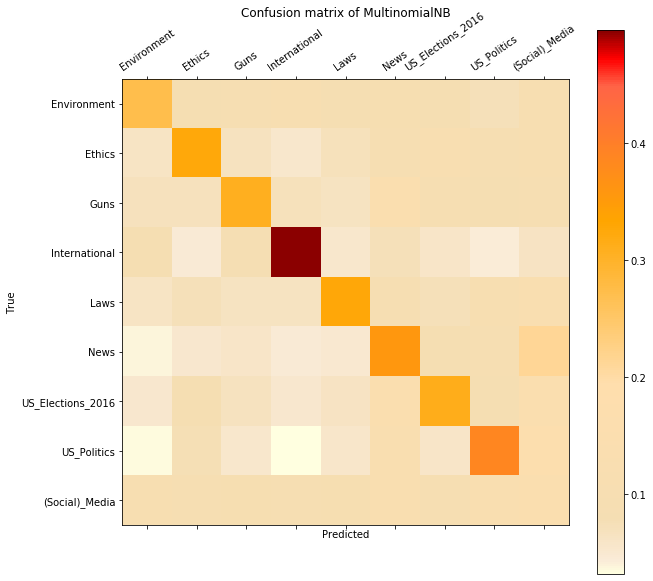

Accuracy:  0.23327592856997856 

Best parameters found:
 {'alpha': 1.0, 'fit_prior': True}
Wall time: 1h 14min 52s


In [36]:
%%time
topic_name = list(np.unique(data_sampling["Keywords"])) # name to summarize the topics found
topic_name.sort() # sorting classes for visualization later
topic_name.append("(Social)_Media")
del topic_name[0]


freq = [10, 20, 30]
ngram = [(1,1), (2,2), (1,2), (3,3)]

tf_idf(X_train, X_test, freq, ngram, MultinomialNB(), topic_name, params={"alpha": np.linspace(0, 1, 5),
                                                                          "fit_prior": [True, False]})